# Aprendizaje supervisado parte 1 -- Clasificación

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from figures import plot_2d_separator
from sklearn.datasets import load_iris

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\n5 primeros ejemplos:\n', X[:5, :])
print('\n5 primeras etiquetas:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

5 primeros ejemplos:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

5 primeras etiquetas: [1 1 0 0 1]


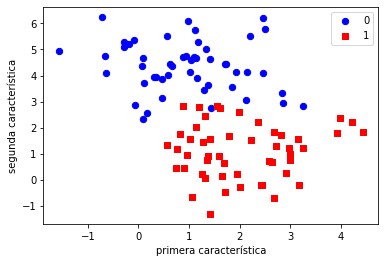

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('primera característica')
plt.ylabel('segunda característica')
plt.legend(loc='upper right');

### Separamos los datos para entrenamiento y test


In [6]:


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### Clasificamos los datos de acuerdo a algun algoritmo. En este caso regresion lineal


In [7]:
classifier = LogisticRegression()

In [8]:
X_train.shape


(75, 2)

In [9]:
y_train.shape


(75,)

In [10]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print(classifier.score(X_test,y_test))


0.84


In [11]:
print(prediction)
print(y_test)


[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


In [12]:
np.mean(prediction == y_test)

0.84

In [13]:
classifier.score(X_train, y_train)

0.9733333333333334

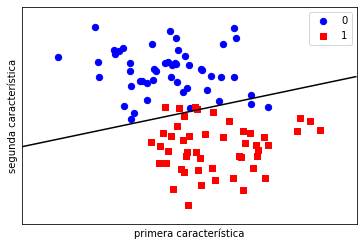

In [14]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

### Anotaciones 
Para que funcione, copiar la carpeta figures del curso en el __init__.py comentar la linea from .plot_interactive_tree import plot_tree_interactive

### Ahora clasificamos con K vecinos cercanos

0.92

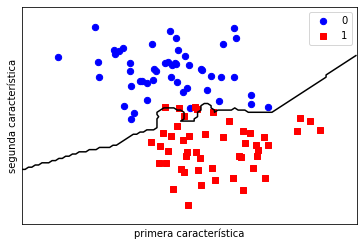

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');
knn.score(X_test, y_test)

<div class="alert alert-success">
    <b>EJERCICIO</b>:
    <p>
Aplicar KNeighborsClassifier al dataset ``iris``. Prueba con distintos valores para el parámetro ``n_neighbors`` y observa como cambian las puntuaciones de entrenamiento y test. </p>
</div>

Empezamos por clasificar los datos en 50% entrenamiento y  50% test. Como son pocos datos los estratificamos

In [21]:
iris = load_iris()
X, y = iris.data, iris.target

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                   test_size=0.5,
                                                   train_size=0.5,
                                                   random_state=123,
                                                   stratify=y)
print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


Ahora vamos a utilizar desde 1 hasta 40 k neighbors para clasificar los datos, y con cada clasificacion vamos a calcular el score, para saber cual seria la mejor opcion a elegir. 


In [62]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(train_X, train_y)

prediction = knn.predict(train_X)
print(prediction)
print(train_y)
#print(knn.score(train_X,train_y))
knn.score(train_X, train_y)

[0 1 1 0 0 2 1 1 2 0 1 0 1 0 0 2 0 2 1 2 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 1 0 2 2 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]


0.92

[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 1 1 2 1 0 0 1 1 0 1 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]


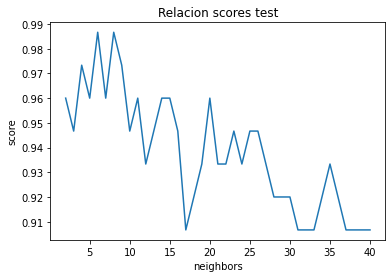

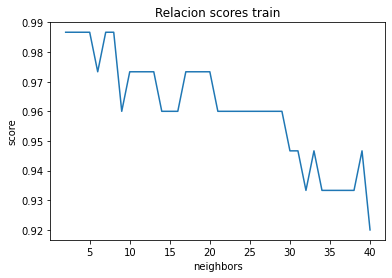

In [56]:
neighbors = np.arange(2,41,1) #De 2 a 40 con 38 puntos al medio
lista_scores_train= []
lista_scores_test= []
predictions = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    predictions.append(knn.predict(test_X))
    lista_scores_test.append(knn.score(test_X, test_y))
    lista_scores_train.append(knn.score(train_X, train_y))
    
print(predictions[0])

plt.plot(neighbors, lista_scores_test)
plt.title("Relacion scores test")
plt.xlabel("neighbors")
plt.ylabel("score")
plt.show()

plt.plot(neighbors, lista_scores_train)
plt.title("Relacion scores train")
plt.xlabel("neighbors")
plt.ylabel("score")
plt.show()